In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#importing the data
df = pd.read_csv("/content/drive/MyDrive/Data for WQU/Mexico_data_clean.csv")

In [ ]:
df.head()

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37


In [ ]:
#question - which state has the most expensive real estate market
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state.head()

,price_usd
state,
Querétaro,133955.913417
Guanajuato,133277.965833
Nuevo León,129221.985834
Distrito Federal,128347.267365
Quintana Roo,128065.415734


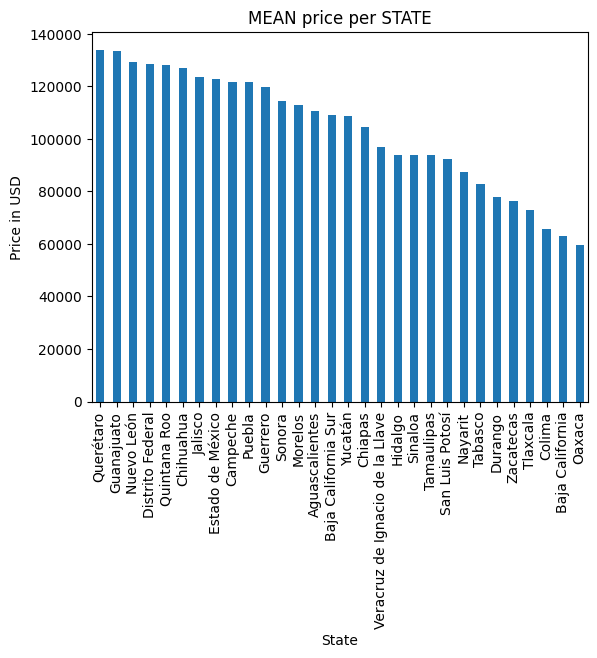

In [ ]:
#lets visualize the states and the prices
mean_price_by_state.plot(
    kind = "bar",
    xlabel = "State",
    ylabel = "Price in USD",
    title = "MEAN price per STATE"

);


In [ ]:
#It seems odd that Querétaro would be the most expensive real estate market in Mexico when, according to recent GDP numbers, it's not in the top 10 state economies.
#With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, we need to create a new column.

In [ ]:
df["price_per_m2"]=df["price_usd"]/df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150.0,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186.0,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82.0,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150.0,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205.0,105191.37,513.128634


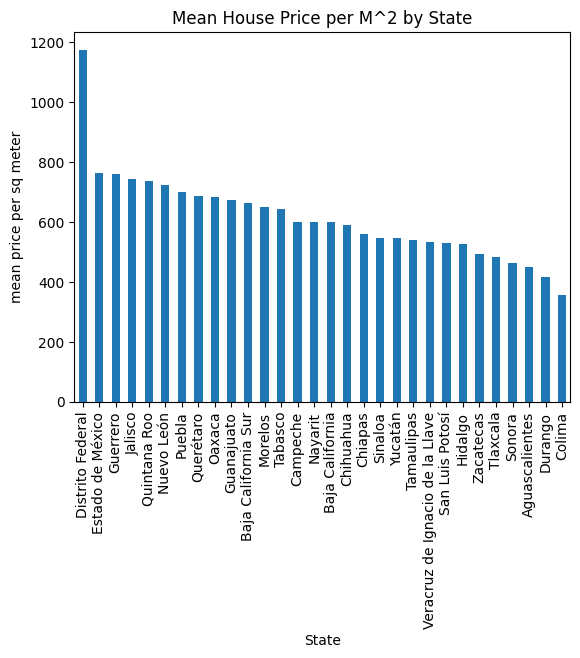

In [ ]:
(
    df
    .groupby("state")["price_per_m2"]
    .mean()
    .sort_values(ascending=False)
    .plot(
        kind="bar",
        xlabel = "State",
        ylabel = "mean price per sq meter",
        title = "Mean House Price per M^2 by State"
    )
);

In [ ]:
#Thus we can conclude that in Mexico city the state of Distrito Federal, the real_eastate market is the most expensive

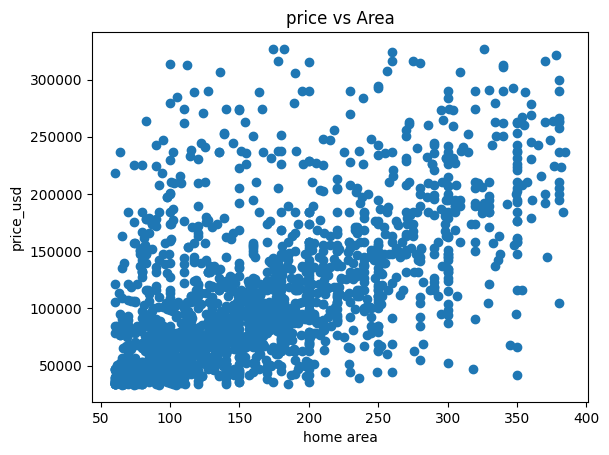

In [ ]:
#In order to investigate the relation between the home price and the home size, we can plot the home price as a function of the size of the home.
#Thus in this case, we can use a scatter plot
plt.scatter(
    x = df["area_m2"],
    y = df["price_usd"],
)
plt.xlabel("home area")
plt.ylabel("price_usd")
plt.title("price vs Area");

In [ ]:
#calculating corr coef
df["area_m2"].corr(df["price_usd"])

np.float64(0.5855182454266904)

In [ ]:
df_morelos = df[df["state"] =="Morelos"]
df_morelos.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,house,Morelos,18.812605,-98.954826,281.0,151509.56,539.179929
9,house,Morelos,18.804197,-98.932816,117.0,63223.78,540.374188
18,house,Morelos,18.855343,-99.241142,73.0,36775.16,503.769315
49,house,Morelos,18.804197,-98.932816,130.0,65858.10,506.600769
55,house,Morelos,18.960244,-99.212962,305.0,227351.46,745.414623


the correlation coeff in Morelos 0.8498077614061482


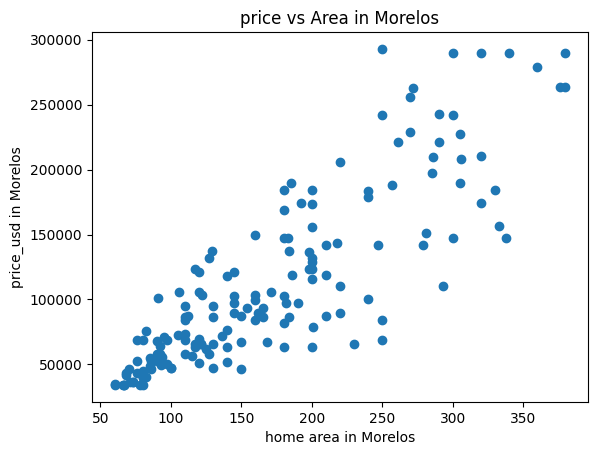

In [ ]:
plt.scatter(
    x = df_morelos["area_m2"],
    y = df_morelos["price_usd"],
)
plt.xlabel("home area in Morelos")
plt.ylabel("price_usd in Morelos")
plt.title("price vs Area in Morelos");

print("the correlation coeff in Morelos", df_morelos["area_m2"]
      .corr(
          df_morelos["price_usd"]))

the correlation coeff in Morelos 0.41070392058534355


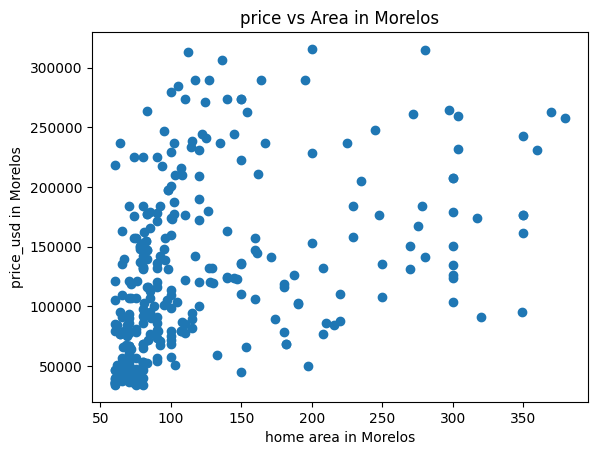

In [ ]:
# doing the same for Mexico city
df_DistFed = df[df["state"] =="Distrito Federal"]
#scatter plot for DF
plt.scatter(
    x = df_DistFed["area_m2"],
    y = df_DistFed["price_usd"],
)
plt.xlabel("home area in Morelos")
plt.ylabel("price_usd in Morelos")
plt.title("price vs Area in Morelos");

print("the correlation coeff in Morelos", df_DistFed["area_m2"]
      .corr(
          df_DistFed["price_usd"]))